# Churn All 

In this case study we have to predict customer churn and calculate score (churn probability) representing the likely of customer churn. This study will help telecommunications companies understand customer churn risk by predicting which customer will churn. Moreover, the findings from this study are helpful for telecommunications companies to optimize their customer retention and/or treatment. 

The Business Pain:

Most telecom companies suffer from voluntary churn. Churn rate has strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company.
It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners.
Telecom companies spend hundreds of dollars to acquire a new customer and when that customer leaves, the company not only loses the future revenue from that customer but also the resources spend to acquire that customer.

## Churn erodes profitability

Churn costs AT&T, Verizon, Comcast and Time Warner Cable billions of dollars every year.

• Roughly 75% of the subscribers signing up every year come from another network—they are already churners.

• The churn rate in developing markets ranges from 20% to 70%. In some of these markets more than 90% of all mobile subscribers are on prepaid service. Some operators in developing markets lose in aggregate their entire subscriber base to churn in a year.

In [162]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import seaborn as sns

After importing the needed libraries, we import our dataset and try to explore it. 

In [163]:
ch = pd.read_csv("Desktop/churn_all.csv")
display(ch.head(5))

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn_Flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [164]:
print("Number of rows: ", ch.shape[0])
counts = ch.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  5000


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
Count of values,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0


In [165]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
international_plan               5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [166]:
ch.phone_number.duplicated().sum()

0

After exploring the data, fortunetly our data was clean so it didn't need much cleaning except for spaces in the headers. Now we need to remove the columns that we will not be needing and wouldn't effect our model. 

In [167]:
ch = ch.drop(["phone_number", "area_code", "state", "international_plan", "voice_mail_plan"], axis=1)
features = ch.drop(["Churn_Flag"], axis=1).columns

Next we will split the data to 2, for traning and testing our models, we will go for 80:20 for our samples. 

In [168]:
ch_train , ch_test = train_test_split(ch, test_size=0.20)

Now starting with the actual work, we will train 3 models which are:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier

Then we will chose the bet performance out of the 3

In [169]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [170]:
#Training and scoring 3 different models 
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,ch_train[features],ch_train["Churn_Flag"], cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.8662500000000002
DT 0.8717500000000001
RF 0.91875


In [171]:
#Since the RandomForest was the best model
#Setting up RandomForestClassifier instance and fit to data
RF = RandomForestClassifier(max_depth = None)
RF.fit(ch_train[features], ch_train["Churn_Flag"]) 

# Make predictions
predictions = RF.predict(ch_test[features])
probs = RF.predict_proba(ch_test[features])
display(predictions)

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [172]:
score = RF.score(ch_test[features], ch_test["Churn_Flag"])
print("Accuracy: ", score)

Accuracy:  0.906


,Predicted False,Predicted True
Actual False,828,9
Actual True,85,78


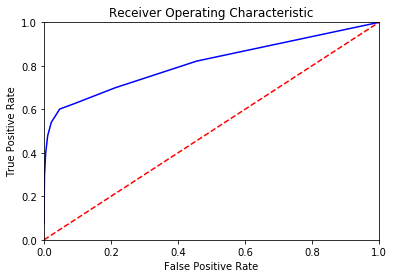

In [173]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(ch_test["Churn_Flag"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(ch_test["Churn_Flag"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After reading the Confusion Matrix, we can understand the following:

## Misclassification Rate

Overall, how often is it wrong?

(FP+FN)/total = (85+9)/1000 = 0.094 This is the "Error Rate"

## True Positive Rate 

When it's actually true, how often does it predict ture?

TP/actual true = 66/163 = 0.52

## False Positive Rate 

When it's actually false, how often does it predict true?

FP/actual false = 9/828 = 0.01

## Specificity 

When it's actually false, how often does it predict false?

TN/actual false = 828/837 = 0.98

## Precision 

When it predicts true, how often is it correct?

TP/predicted true = 78/87 = 0.89

## Prevalence 

How often does the true condition actually occur in our sample?

actual true/total = 163/1000 = 0.163

,importance,labels
4,0.170427,total_day_charge
2,0.150536,total_day_minutes
14,0.109969,number_customer_service_calls
5,0.075664,total_eve_minutes
7,0.073019,total_eve_charge


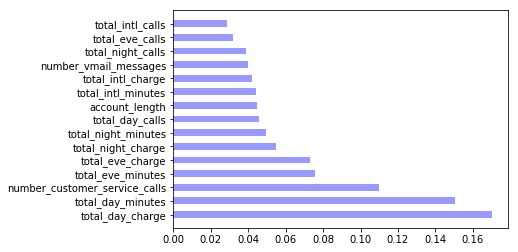

In [175]:
df_f = pd.DataFrame(RF.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(RF.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [179]:
ch_test["Probability_True"] = probs[:, 1]
ch_risky = ch_test[ch_test["Probability_True"] > 0.9]
display(ch_risky.head(20)[["Probability_True"]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Probability_True
1701,1.0
3169,1.0
4513,1.0
1531,1.0
2515,1.0
2028,1.0
4918,1.0
306,1.0
126,1.0
1731,1.0
